In [85]:
import scipy.stats as scipy
import src.data_processing.data as data
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import os
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [22]:
print(data.stations)

           URI              name country-code  longitude   latitude  \
3    008895000             AALST           be   4.039653  50.942813   
4    008895125  AALST-KERREBROEK           be   4.024407  50.948377   
5    008891140            AALTER           be   3.447848  51.092295   
6    008833209          AARSCHOT           be   4.824043  50.984406   
7    008892288           AARSELE           be   3.418363  50.984460   
..         ...               ...          ...        ...        ...   
669  008832250            ZOLDER           be   5.329900  51.033548   
670  008832334          ZONHOVEN           be   5.348815  50.989557   
671  008895208          ZOTTEGEM           be   3.814410  50.869102   
673  008894821       ZWIJNDRECHT           be   4.329780  51.214108   
674  008883212       ÉCAUSSINNES           be   4.156639  50.562390   

     avg_stop_times  official_transfer_time  
3        157.425373                   300.0  
4          7.731343                   300.0  
5        

In [23]:
Dict = dict({'antwerpen-caal': 'antwerpen-centraal',
             'arcades': 'arcaden/arcades',
             'beignee': 'beignée',
             'berchem-st-ag.-berchem': 'sint-agatha-berchem/berchem-sainte-agathe',
             'berzee' : 'berzée',
             'boitsfort/bosvoorde' : 'bosvoorde/boitsfort',
             'boondael/boondaal' : 'boondaal/boondael',
             'bru. airport - zaventem' : 'brussels airport - zaventem',
             'bru.-cent.' : 'brussel-centraal/bruxelles-central',
             'bru.-chap./kap.' : 'brussel-kapellekerk/bruxelles-chapelle',
             'bru.-cong.' : 'brussel-congres/bruxelles-congrès',
             'bru.-luxembg' : 'brussel-luxemburg/bruxelles-luxembourg',
             'bru.-midi/zuid' : 'brussel-zuid/bruxelles-midi',
             'bru.-noord/nord' : 'brussel-noord/bruxelles-nord',
             'bru.-schuman' : 'brussel-schuman/bruxelles-schuman',
             'bru.-west/ouest' : 'brussel-west/bruxelles-ouest',
             'chateau-de-seilles' : 'château-de-seilles',
             'chatelet' : 'châtelet',
             'chenee' : 'chênée',
             'comines/komen' : 'comines',
             'courriere' : 'courrière',
             'court-saint-etienne' : 'court-saint-étienne',
             'ecaussinnes' : 'écaussinnes',
             'enghien/edingen' : 'enghien',
             'erbisoeul' : 'erbisœul',
             'fexhe-le-ht-clocher':'fexhe-le-haut-clocher',
             'forest-est/vorst-oost' : 'vorst-oost/forest-est',
             'forest-midi/vorst-zuid' :'vorst-zuid/forest-midi',
             'forrieres' : 'forrières',
             'franiere' : 'franière',
             'germoir/mouterij' : 'mouterij/germoir',
             'haren-zuid/sud' : 'haren-sud/haren-zuid',
             'haute-flone' : 'haute-flône',
             'hennuyeres' : 'hennuyères',
             'jurbise' : 'jurbeke',
             'la louviere-centre' : 'la louvière-centre',
             'la louviere-sud' : 'la louvière-sud',
             'la roche' : 'la roche (brabant)',
             'labuissiere' : 'labuissière',
             'lessines' : 'lessen',
             'liege-carre' : 'liège-carré',
             'liege-guillemins' : 'liège-guillemins',
             'liege-saint-lambert' : 'liège-saint-lambert',
             'lonzee' : 'lonzée',
             'marche-lez-ecaussinnes' : 'marche-lez-écaussinnes',
             'mery' : 'méry',
             'mortsel-oude-god' : 'mortsel-oude god',
             'mouscron/moeskroen' : 'mouscron',
             'nameche' : 'namêche',
             'neufchateau' : 'neufchâteau',
             'ougree' : 'ougrée',
             'papignies' : 'papegem',
             'pecrot' : 'pécrot',
             'pepinster-cite' : 'pepinster-cité',
             'peruwelz' : 'péruwelz',
             'pieton' : 'piéton',
             'pont-a-celles' : 'pont-à-celles',
             'ronse/renaix' : 'ronse',
             'ruisbr.-sauvegarde' : 'ruisbroek-sauvegarde',
             'spa-geronstere' : 'spa-géronstère',
             'st-denijs-boekel' : 'sint-denijs-boekel',
             'st-denis-bovesse' : 'saint-denis-bovesse',
             'st-gen-rode/rhode-st-gen' : 'sint-genesius-rode',
             'st-ghislain' : 'saint-ghislain',
             'st-gillis' : 'sint-gillis-dendermonde',
             'st-job' : 'sint-job',
             'st-joris-weert' : 'sint-joris-weert',
             'st-katelijne-waver' : 'sint-katelijne-waver',
             'st-mariaburg' : 'sint-mariaburg',
             'st-martens-bodegem' : 'sint-martens-bodegem',
             'st-niklaas' : 'sint-niklaas',
             'st-truiden' : 'sint-truiden',
             'tour et taxis/thurn en taxis' : 'thurn en taxis/tour et taxis',
             'uccle/ukkel-calevoet' : 'ukkel-kalevoet/uccle-calevoet',
             'uccle/ukkel-stalle' : 'ukkel-stalle/uccle-stalle',
             'ville-pommeroeul' : 'ville-pommerœul',
             'vise' : 'visé',
             'vivier d\'oie/diesdelle' : 'diesdelle/vivier d\'oie',
             'watermael/watermaal' : 'watermaal/watermael',
             'yves-gomezee' : 'yves-gomezée'
             })
data.stations = data.stations.replace({"Station": Dict})
data.stations['name'] = data.stations['name'].str.upper()
data.satisfaction['station'] = data.satisfaction['station'].str.upper()
data.stations

,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,008895000,AALST,be,4.039653,50.942813,157.425373,300.0
4,008895125,AALST-KERREBROEK,be,4.024407,50.948377,7.731343,300.0
5,008891140,AALTER,be,3.447848,51.092295,188.276119,240.0
6,008833209,AARSCHOT,be,4.824043,50.984406,171.664179,240.0
7,008892288,AARSELE,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...
669,008832250,ZOLDER,be,5.329900,51.033548,30.910448,300.0
670,008832334,ZONHOVEN,be,5.348815,50.989557,30.910448,300.0
671,008895208,ZOTTEGEM,be,3.814410,50.869102,161.223881,240.0
673,008894821,ZWIJNDRECHT,be,4.329780,51.214108,150.514925,300.0


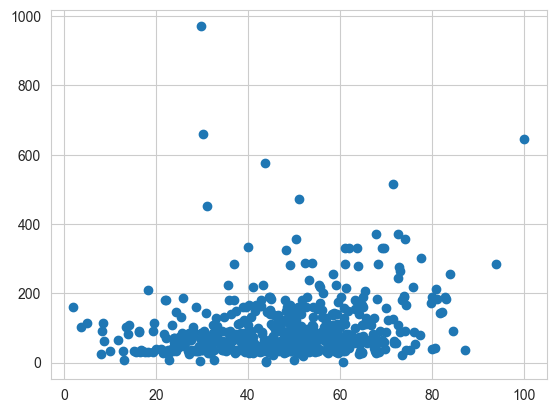

In [24]:
new_data1 = pd.merge(data.satisfaction,data.stations,how ='inner',left_on = "station",right_on = "name")
new_data1.rename(columns={'Avg Satisfaction':'scores'},inplace=True)
data.satisfaction
plt.scatter(new_data1.scores, new_data1.avg_stop_times)

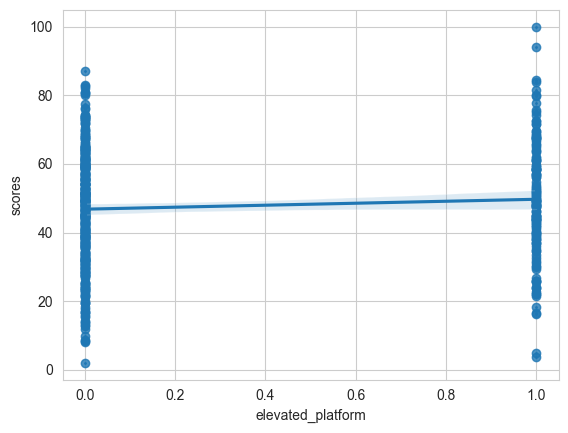

In [25]:
data.facilities = data.facilities.replace({"Station": Dict})
data.facilities['name'] = data.facilities['name'].str.upper()
data.facilities
new_data2 = pd.merge(data.satisfaction,data.facilities,how ='inner',left_on = "station",right_on = "name")
new_data2.rename(columns={'Avg Satisfaction':'scores'},inplace=True)
sns.regplot(x=new_data2.elevated_platform, y = new_data2.scores)
plt.scatter(new_data2.elevated_platform, new_data2.scores,s=1)

Text(0, 0.5, 'scores')

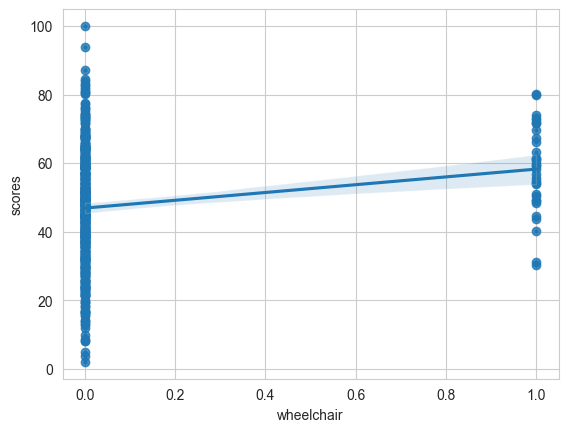

In [26]:
plt.scatter(new_data2.wheelchair_available, new_data2.scores,s=4)
sns.regplot(x=new_data2.wheelchair_available, y = new_data2.scores)
plt.xlabel("wheelchair")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

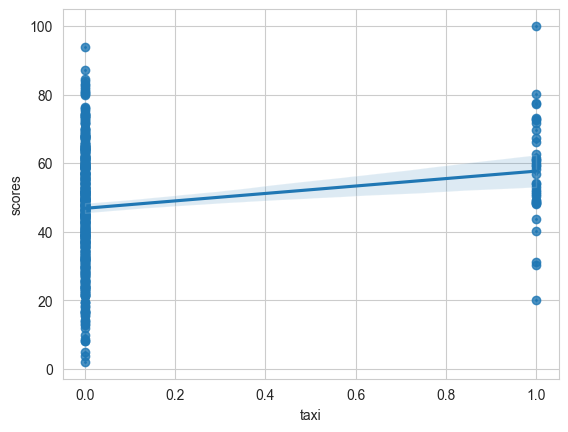

In [27]:
plt.scatter(new_data2.taxi, new_data2.scores,s=1)
sns.regplot(x=new_data2.taxi, y = new_data2.scores)
plt.xlabel("taxi")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

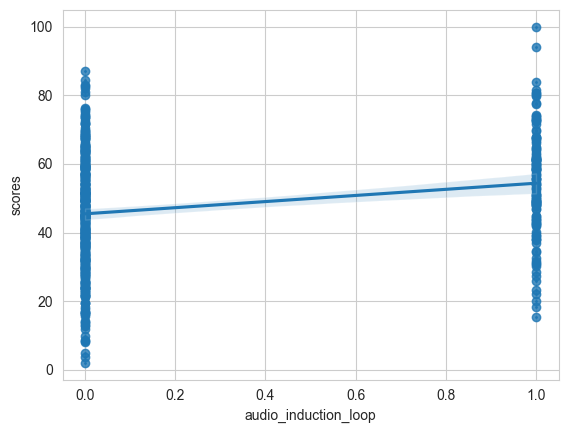

In [28]:
plt.scatter(new_data2.audio_induction_loop, new_data2.scores,s=1)
sns.regplot(x=new_data2.audio_induction_loop, y = new_data2.scores)
plt.xlabel("audio_induction_loop")
plt.ylabel("scores")

<AxesSubplot:xlabel='free_parking', ylabel='scores'>

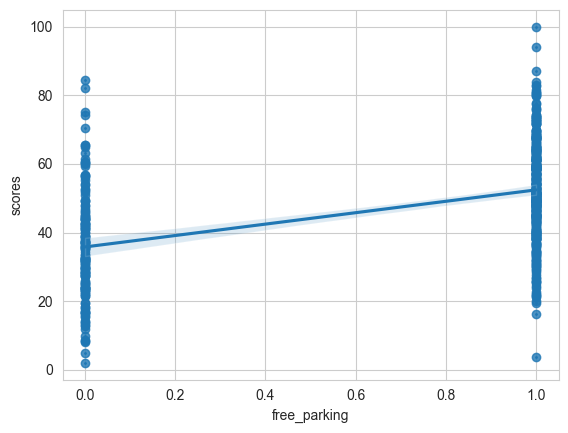

In [29]:
plt.scatter(new_data2.free_parking, new_data2.scores,s=1)
sns.regplot(x=new_data2.free_parking, y = new_data2.scores)

<AxesSubplot:xlabel='taxi', ylabel='scores'>

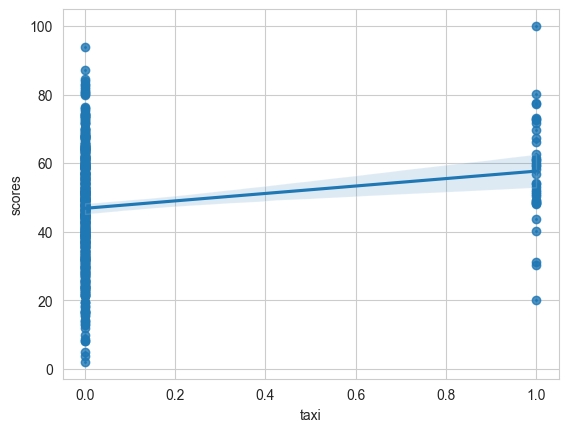

In [30]:
plt.scatter(new_data2.taxi, new_data2.scores,s=1)
sns.regplot(x=new_data2.taxi, y = new_data2.scores)

Text(0, 0.5, 'scores')

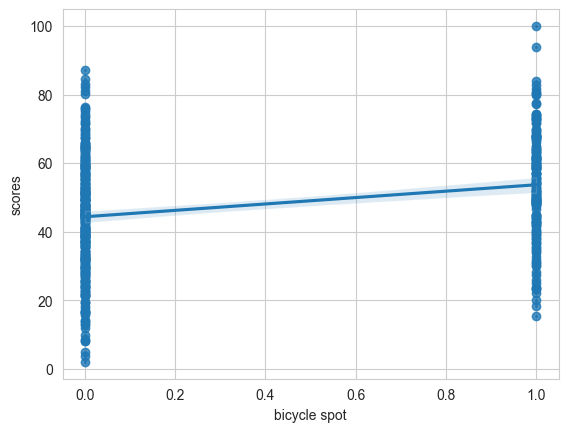

In [31]:
plt.scatter(new_data2.bicycle_spots, new_data2.scores,s=1)
sns.regplot(x=new_data2.bicycle_spots, y = new_data2.scores)
plt.xlabel("bicycle spot")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

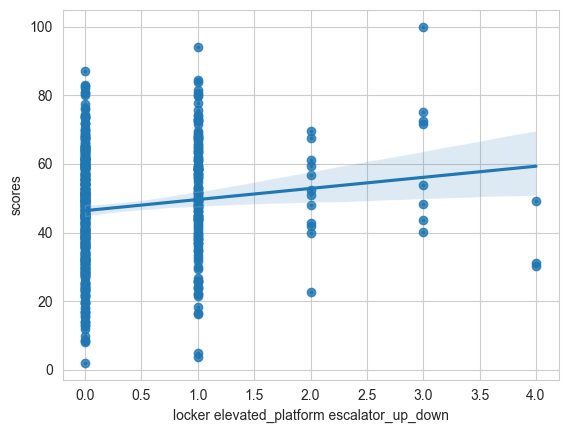

In [32]:
#whether the faciliteis insdie teh platform have a influence
sns.scatterplot(x=new_data2.luggage_lockers+new_data2.elevated_platform+ new_data2.escalator_up + new_data2.escalator_down, y=new_data2.scores, s=8)
sns.regplot(x=new_data2.luggage_lockers+new_data2.elevated_platform+ new_data2.escalator_up + new_data2.escalator_down, y = new_data2.scores)
plt.xlabel("locker elevated_platform escalator_up_down")
plt.ylabel("scores")

In [98]:
x_facilities_station = new_data2.luggage_lockers+new_data2.elevated_platform+ new_data2.escalator_up + new_data2.escalator_down
y_scores_facilities=new_data2.scores
model_transport= sm.OLS(y_scores_facilities,x_facilities_station).fit()
model_transport.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 scores   R-squared (uncentered):                   0.252
Model:                            OLS   Adj. R-squared (uncentered):              0.250
Method:                 Least Squares   F-statistic:                              176.8
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    5.68e-35
Time:                        15:13:19   Log-Likelihood:                         -2731.7
No. Observations:                 526   AIC:                                      5465.
Df Residuals:                     525   BIC:                                      5470.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            33.2022      2.497     13.295      0.000      28.296      38.108
==============================================================================
Omnibus:                      149.323   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.288
Skew:                          -1.324   Prob(JB):                    1.69e-103
Kurtosis:                       6.818   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'scores')

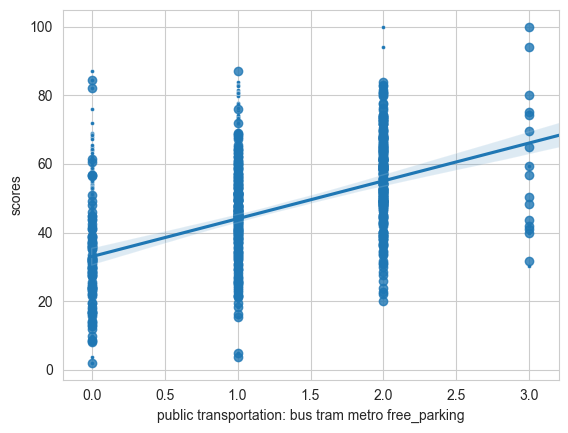

In [97]:
#whether other method of transportations influences the satisfaction
sns.scatterplot(x=new_data2.bus+new_data2.tram + new_data2.metro , y=new_data2.scores, s=8)
sns.regplot(x=new_data2.bus+new_data2.tram + new_data2.free_parking + new_data2.metro, y = new_data2.scores)
plt.xlim([-0.2,3.2])
plt.xlabel("public transportation: bus tram metro free_parking")
plt.ylabel("scores")

In [ ]:
x_transport = new_data2.bus + new_data2.tram + new_data2.metro
y_scores_trasport=new_data2.scores
model_transport= sm.OLS(y_scores_trasport,x_transport).fit()
model_transport.summary()

In [99]:
x_transport = new_data2.bus + new_data2.tram + new_data2.metro
y_scores_trasport=new_data2.scores
model_transport= sm.OLS(y_scores_trasport,x_transport).fit()
model_transport.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 scores   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              688.2
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    1.51e-97
Time:                        15:14:01   Log-Likelihood:                         -2587.7
No. Observations:                 526   AIC:                                      5177.
Df Residuals:                     525   BIC:                                      5182.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            43.6716      1.665     26.233      0.000      40.401      46.942
==============================================================================
Omnibus:                       67.657   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.677
Skew:                          -0.739   Prob(JB):                     5.69e-30
Kurtosis:                       4.989   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'scores')

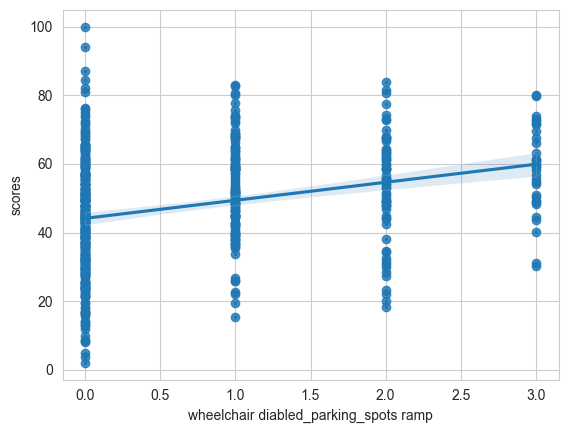

In [34]:
#whetehr the facilities for disable people influences the satisfaction
sns.scatterplot(x=new_data2.wheelchair_available + new_data2.disabled_parking_spots + new_data2.ramp, y=new_data2.scores, s=8)
sns.regplot(x=new_data2.wheelchair_available + new_data2.disabled_parking_spots + new_data2.ramp, y = new_data2.scores)
plt.xlabel("wheelchair diabled_parking_spots ramp")
plt.ylabel("scores")

In [90]:
x_disabeld = new_data2.wheelchair_available + new_data2.disabled_parking_spots + new_data2.ramp
y_scores_disabled = new_data2['scores']
model_disabeld= sm.OLS(y_scores_disabled,x_disabeld).fit()
model_disabeld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 scores   R-squared (uncentered):                   0.397
Model:                            OLS   Adj. R-squared (uncentered):              0.395
Method:                 Least Squares   F-statistic:                              345.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    1.41e-59
Time:                        15:09:25   Log-Likelihood:                         -2675.2
No. Observations:                 526   AIC:                                      5352.
Df Residuals:                     525   BIC:                                      5357.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            28.1935      1.518     18.576      0.000      25.212      31.175
==============================================================================
Omnibus:                       28.654   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.843
Skew:                          -0.590   Prob(JB):                     1.22e-07
Kurtosis:                       3.250   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
new_data2


,Unnamed: 0,station,scores,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,0,COURCELLES-MOTTE,3.63,008871225,COURCELLES-MOTTE,Rue Churchill 390,6180,Courcelles,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days
1,1,ROUX,13.58,008871217,ROUX,Rue Foulon 8,6044,Roux,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days
2,5,MARCHIENNE-AU-PONT,25.93,008871100,MARCHIENNE-AU-PONT,Place Des Combattants,6030,Marchienne-Au-Pont,1.0,0.0,...,05:45:00,13:00:00,05:45:00,13:00:00,05:45:00,13:00:00,0 days,0 days,0 days,0 days
3,6,LUTTRE,34.73,008871308,LUTTRE,Avenue De La Gare 1,6238,Luttre,1.0,0.0,...,05:45:00,13:00:00,05:45:00,13:00:00,05:45:00,13:00:00,0 days,0 days,0 days,0 days
4,7,OBAIX-BUZET,16.25,008871332,OBAIX-BUZET,Rue De La Station - Rue Du Tienne,6230,Luttre,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,613,RIVAGE,39.72,008842705,RIVAGE,Rue De Rivage 2,4140,Rivage,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days
522,614,NEERPELT,67.49,008832615,NEERPELT,Stationsstraat 84,3910,Neerpelt,1.0,0.0,...,07:15:00,14:30:00,07:15:00,14:30:00,07:15:00,14:30:00,0 days,0 days,0 days,0 days
523,615,MELREUX-HOTTON,59.09,008864436,MELREUX-HOTTON,Avenue De La Gare 1,6990,Hotton,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days
524,617,VIELSALM,51.74,008845146,VIELSALM,Rue De La Station 3,6690,Vielsalm,1.0,0.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0 days,0 days,0 days,0 days


In [45]:
trips = data.full_trips
trips['Name of the stop'] = trips['Name of the stop'].str.upper()
trips['Name of the stop'].unique()
delay_stop = trips.groupby('Name of the stop')['Delay time'].sum()
delay_stop

Name of the stop
AALST                 132524
AALST-KERREBROEK        3209
AALTER                117825
AARSCHOT               79891
AARSELE                34880
                       ...  
ZOLDER-KRUISSPOREN     24161
ZONHOVEN               27674
ZOTTEGEM               77810
ZWIJNDRECHT           103730
ÉCAUSSINNES            59251
Name: Delay time, Length: 627, dtype: int64

-20.946595720016283 7.261687211226702e-83


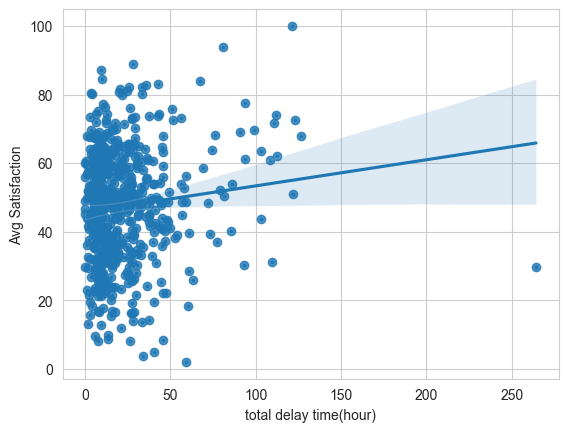

In [73]:
delay_stop_satifaction = pd.merge(delay_stop,data.satisfaction,how ='inner',left_on = "Name of the stop",right_on = "station")
delay_stop_satifaction
delay_stop_satifaction['Delay time'] = delay_stop_satifaction['Delay time']/3600

sns.scatterplot(x=delay_stop_satifaction['Delay time'], y=delay_stop_satifaction['Avg Satisfaction'], s=8)
sns.regplot(x=delay_stop_satifaction['Delay time'], y = delay_stop_satifaction['Avg Satisfaction'])
plt.xlabel('total delay time(hour)')
t, pval = scipy.stats.ttest_ind(delay_stop_satifaction['Delay time'], delay_stop_satifaction['Avg Satisfaction'])
print(t,pval)
#satifaction is not highly correalted with the delay time, where the delay time is smaller it doesn't mean that the satisfaction will be higher

In [82]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [83]:
x_dely_time = delay_stop_satifaction['Delay time']
y_scores_delay_time = delay_stop_satifaction['Avg Satisfaction']
model_delay_time = sm.OLS(y_scores_delay_time,x_dely_time).fit()
model_delay_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Avg Satisfaction   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              482.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    3.35e-78
Time:                        14:59:26   Log-Likelihood:                         -2918.5
No. Observations:                 580   AIC:                                      5839.
Df Residuals:                     579   BIC:                                      5843.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delay time     1.0376      0.047     21.958      0.000       0.945       1.130
==============================================================================
Omnibus:                      342.227   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5667.482
Skew:                          -2.258   Prob(JB):                         0.00
Kurtosis:                      17.633   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""